Tải và xem dữ liệu

In [1]:
import pandas as pd

# Tải dữ liệu
data = pd.read_csv('/kaggle/input/cs116dataset/train.csv')

# Xem thông tin tổng quát
print(data.head())
print(data.info())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [2]:
# Thống kê mô tả cho các biến số
print(data.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [3]:
# Kiểm tra số lượng giá trị thiếu trong từng cột
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Data Distribution

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
train = pd.read_csv('/kaggle/input/cs116dataset/train.csv')
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']
 


<ipython-input-5-e0dfb7677eca>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], fit=stats.norm, ax=ax1)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-5-e0dfb7677eca>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function

<Axes: title={'center': 'Log Normal'}, xlabel='SalePrice', ylabel='Density'>

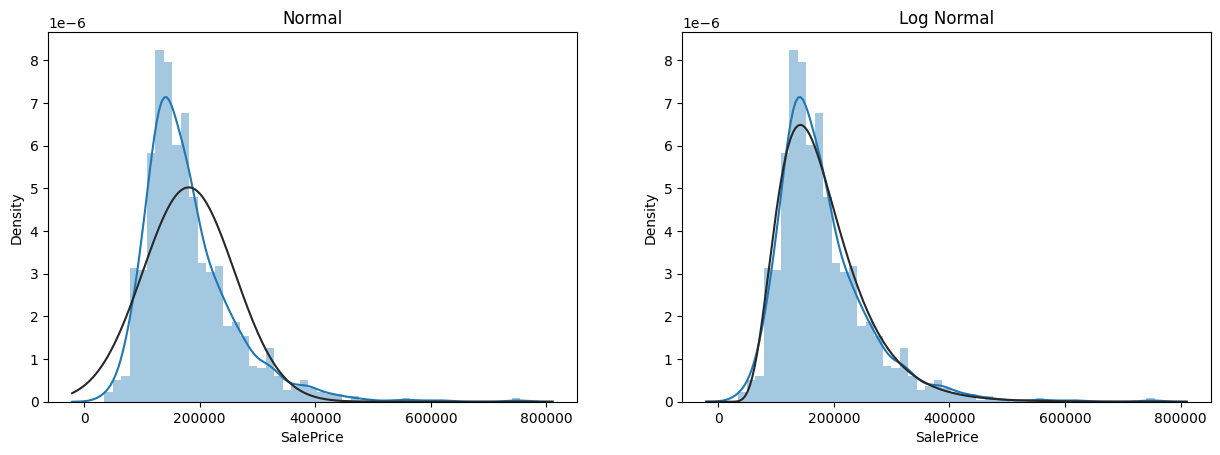

In [5]:
from scipy import stats
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_figwidth(15, forward=True)
ax1.set_title('Normal')
sns.distplot(train['SalePrice'], fit=stats.norm, ax=ax1)
ax2.set_title('Log Normal')
sns.distplot(train['SalePrice'], fit=stats.lognorm, ax=ax2)


Quantitative Attributes

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) 

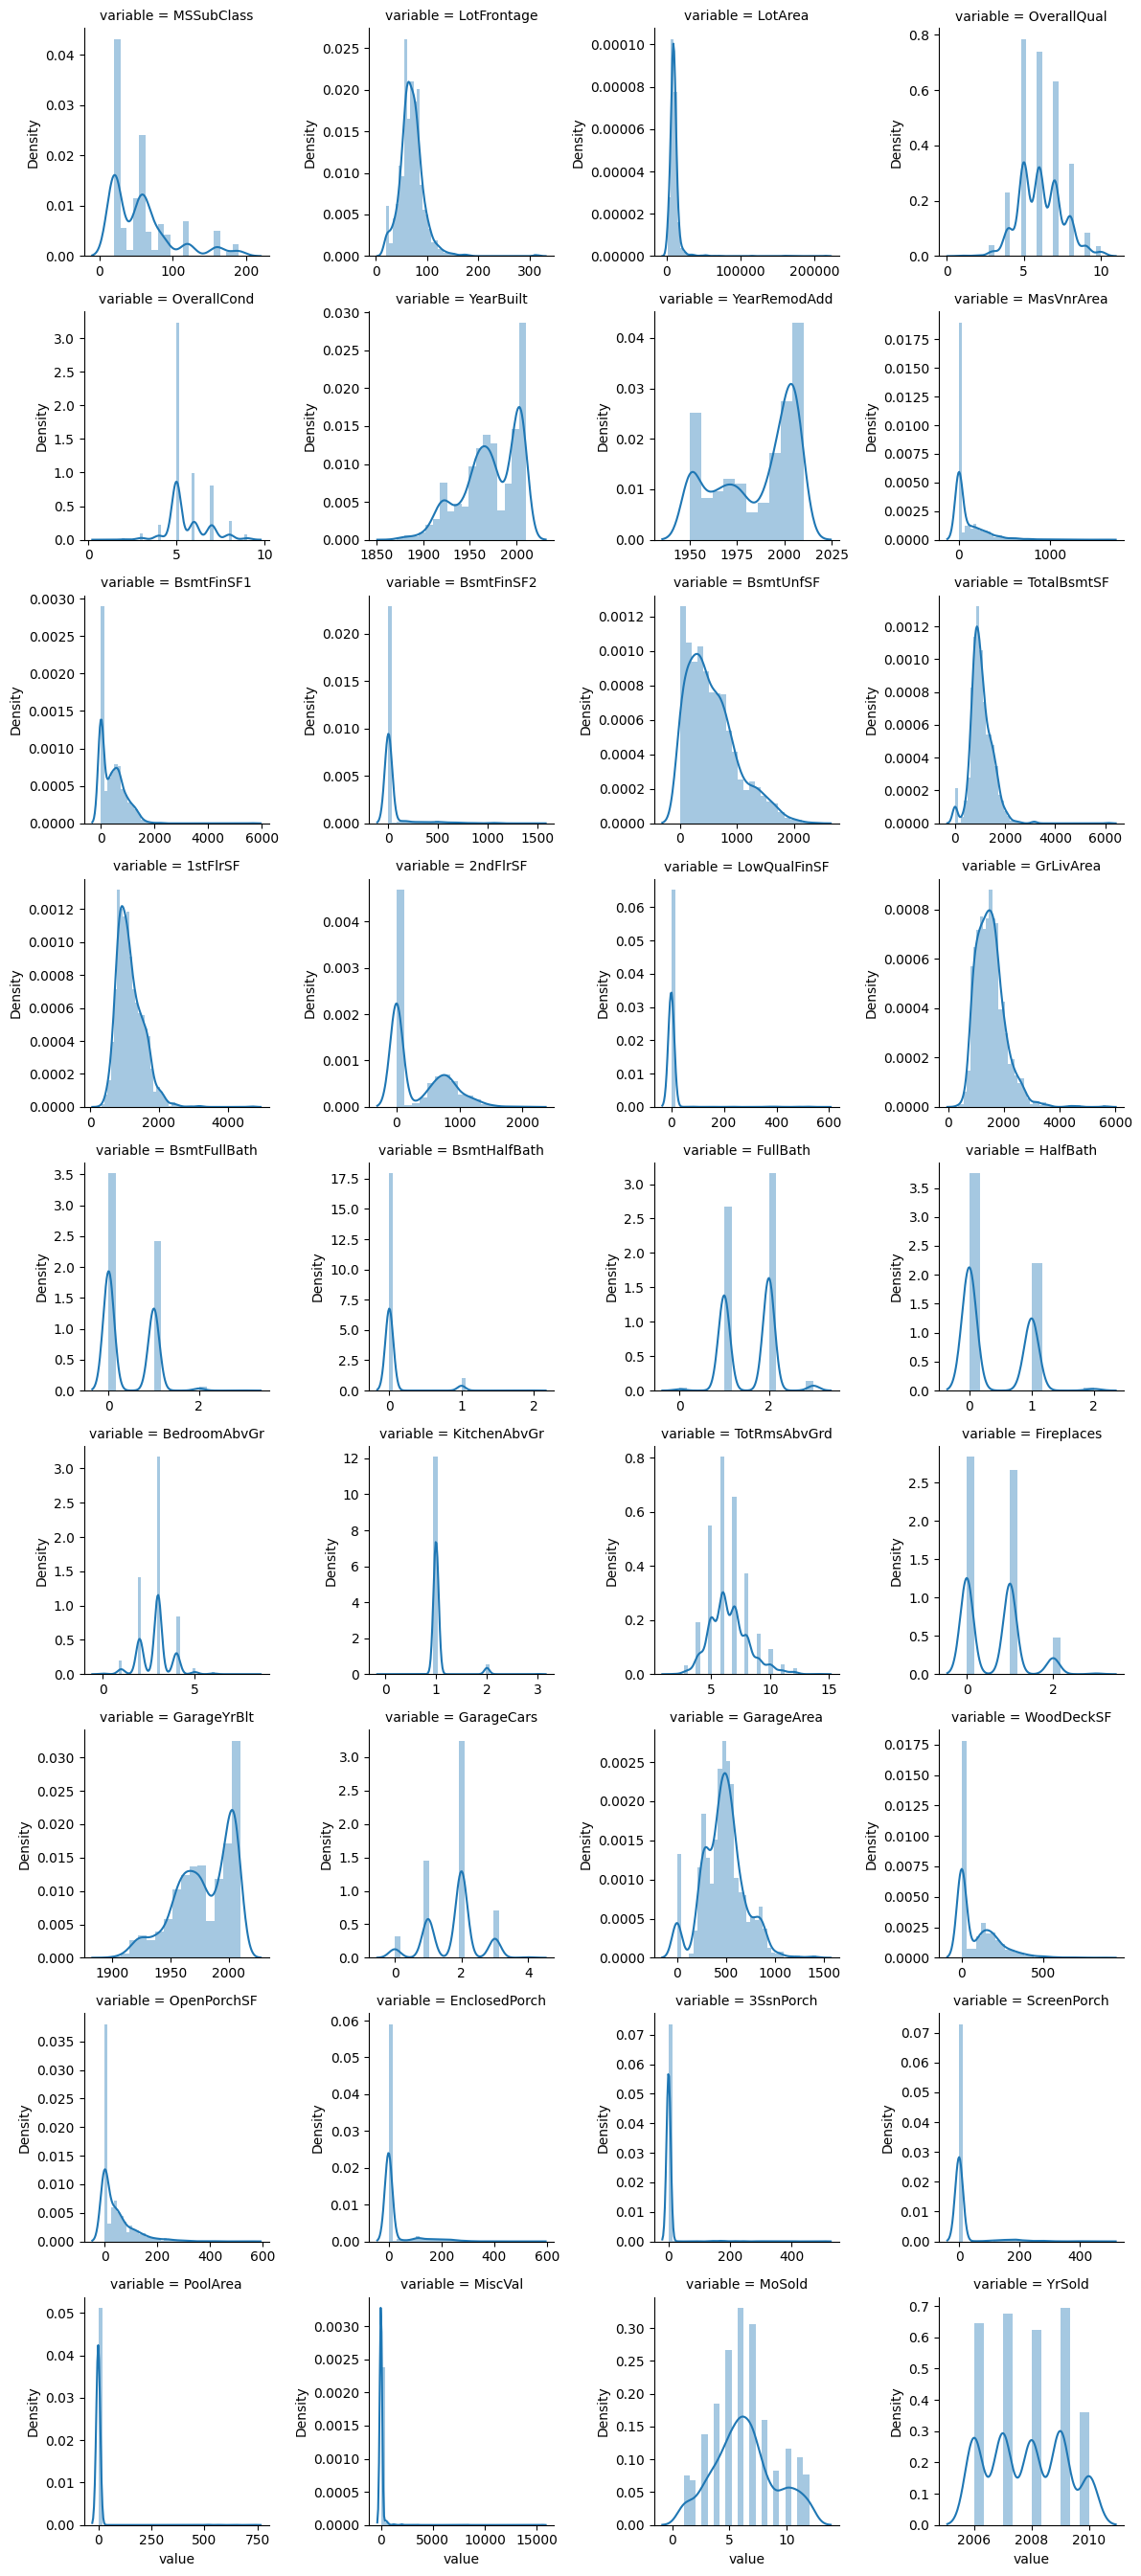

In [6]:
f = pd.melt(train, value_vars=quantitative)
grid = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
grid = grid.map(sns.distplot, 'value')


Quan hệ giữa giá nhà với các giá trị định lượng thông qua biểu đồ scatter plot.

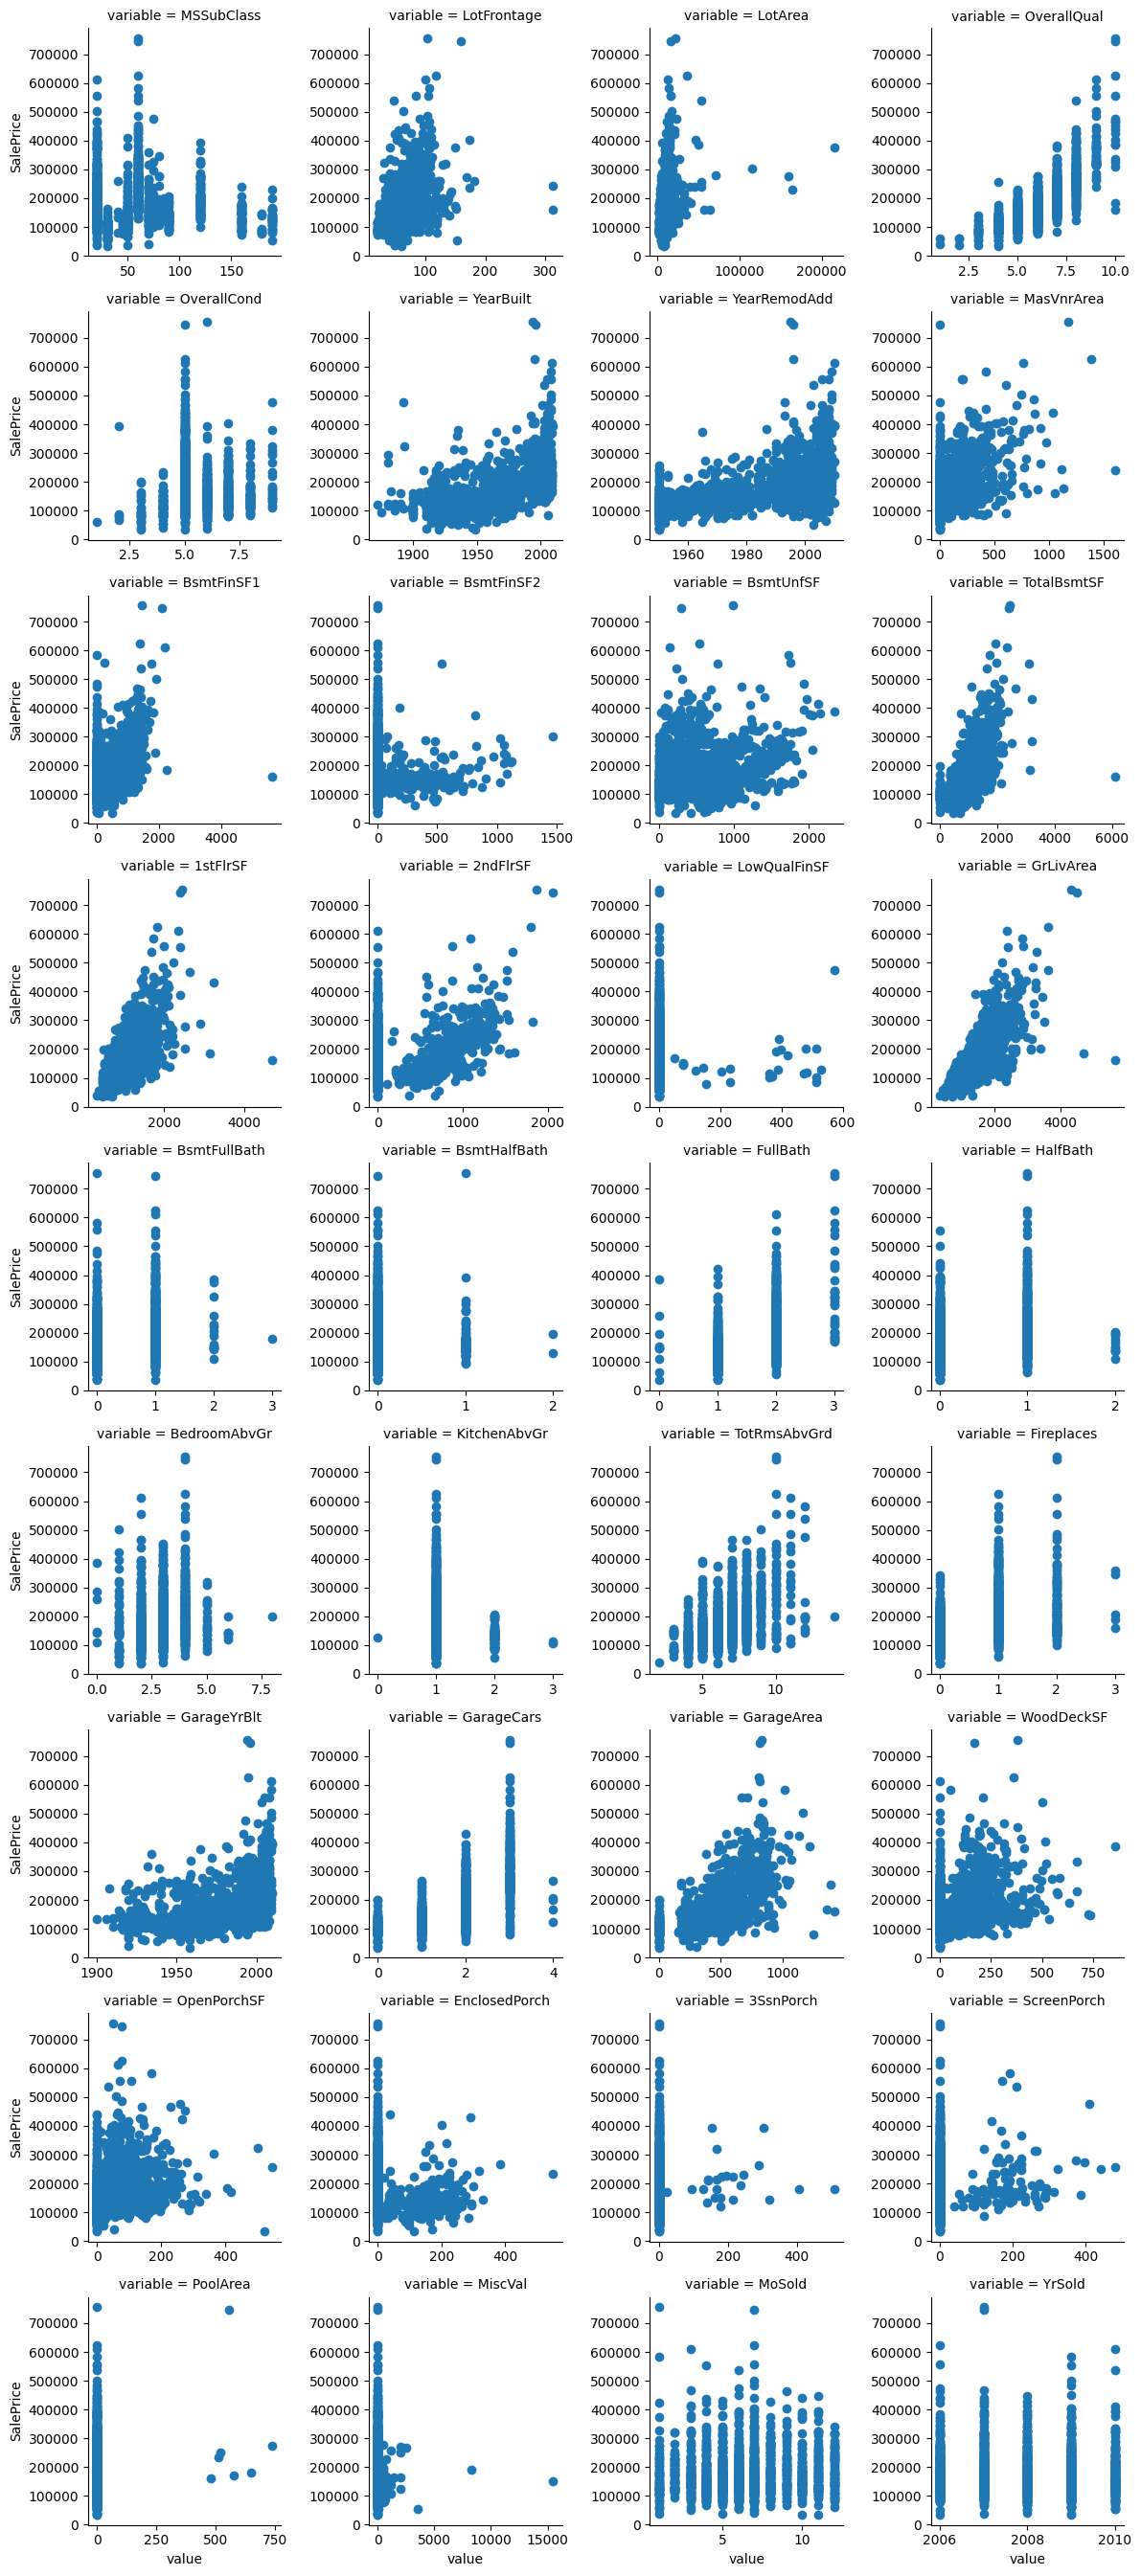

In [7]:
f = pd.melt(train, id_vars=['SalePrice'], value_vars=quantitative)
grid = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
grid = grid.map(plt.scatter, 'value', 'SalePrice')
 

Qualitative Attributes

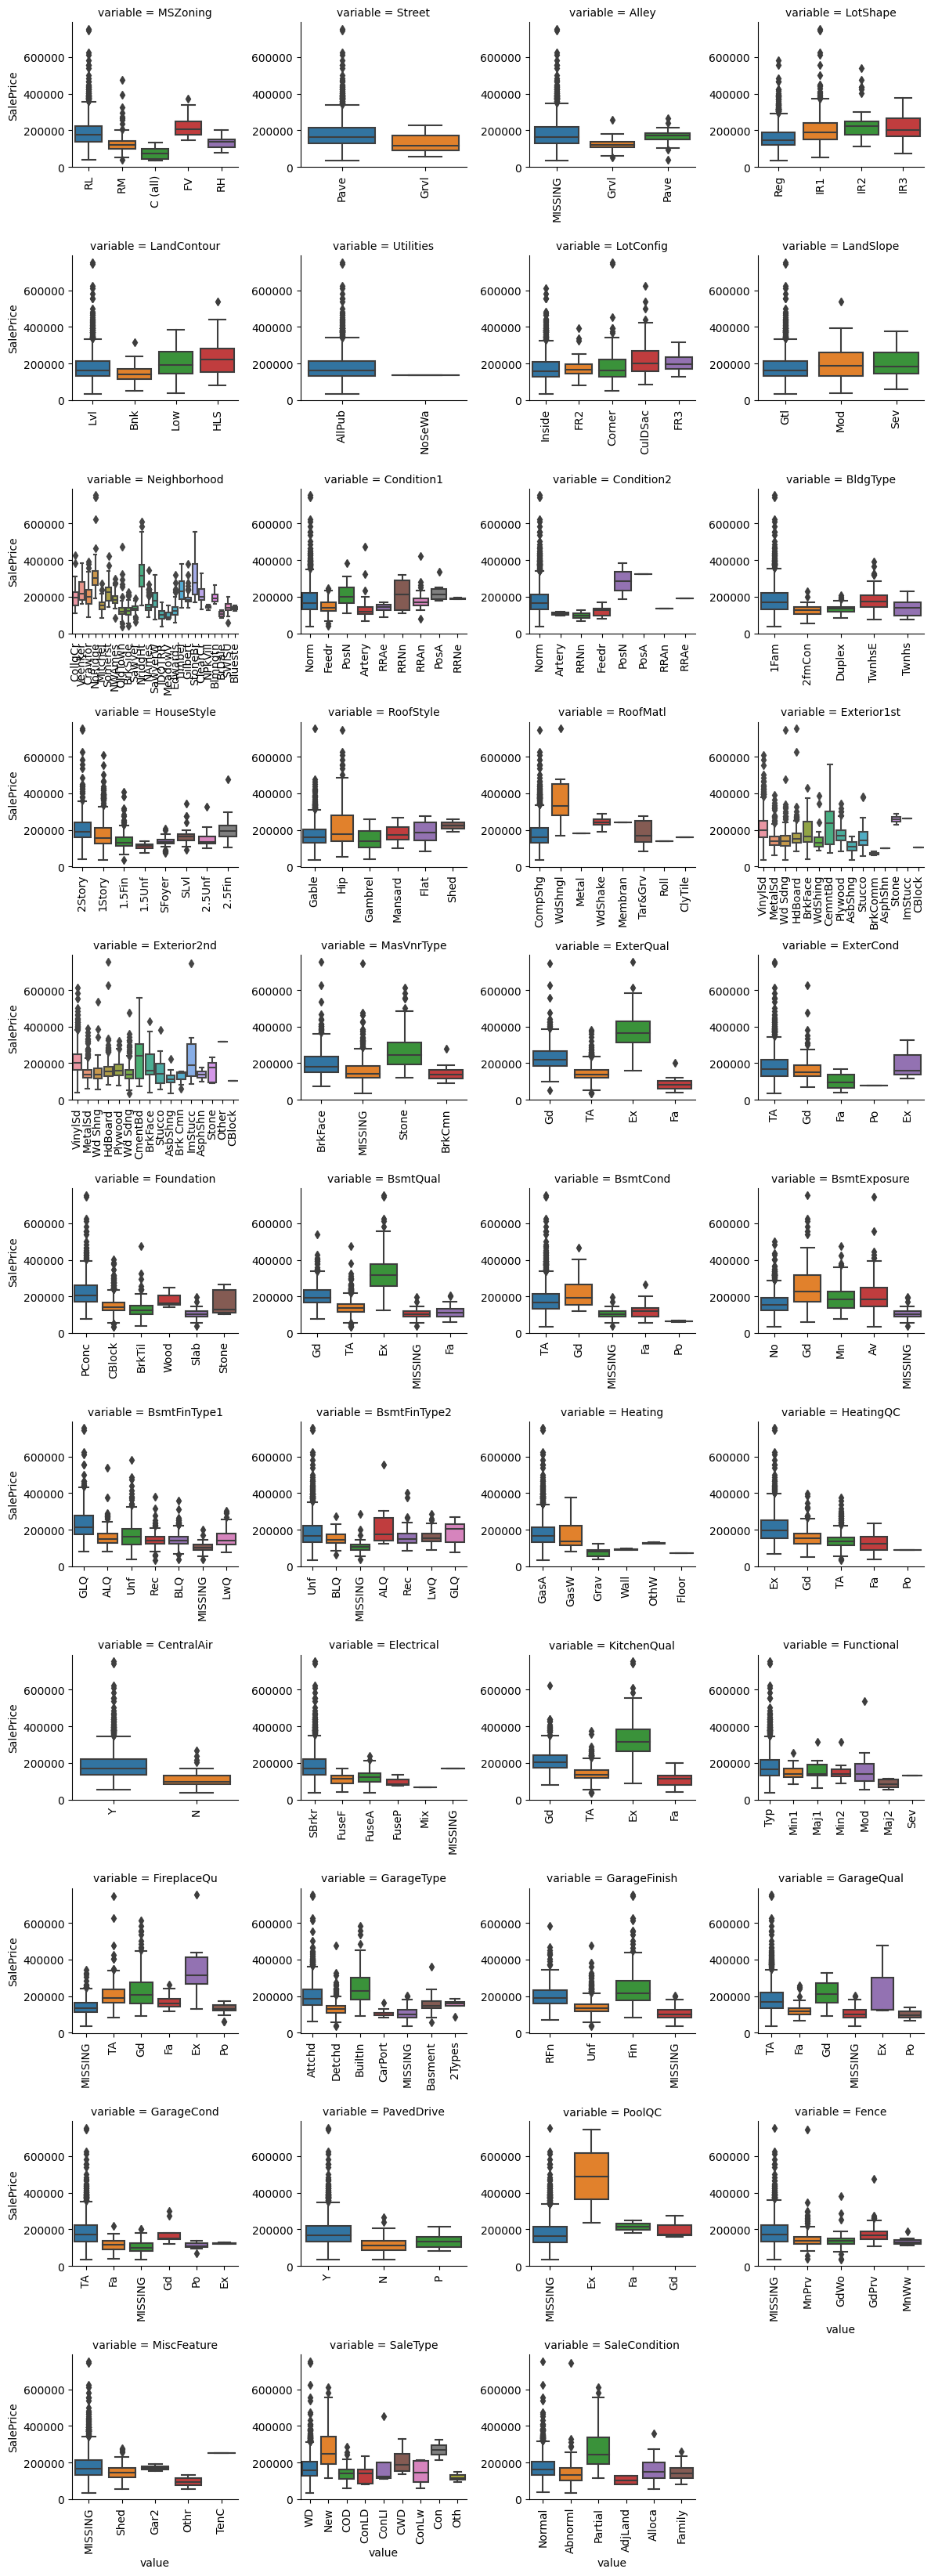

In [8]:
train_nomissing = train.copy()
for c in qualitative:
  train_nomissing[c] = train[c].astype('category')
  if train_nomissing[c].isnull().any():
    train_nomissing[c] = train_nomissing[c].cat.add_categories(['MISSING'])
    train_nomissing[c] = train_nomissing[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
  sns.boxplot(x=x, y=y)
  x=plt.xticks(rotation=90)
f = pd.melt(train_nomissing, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
g = g.map(boxplot, 'value', 'SalePrice')


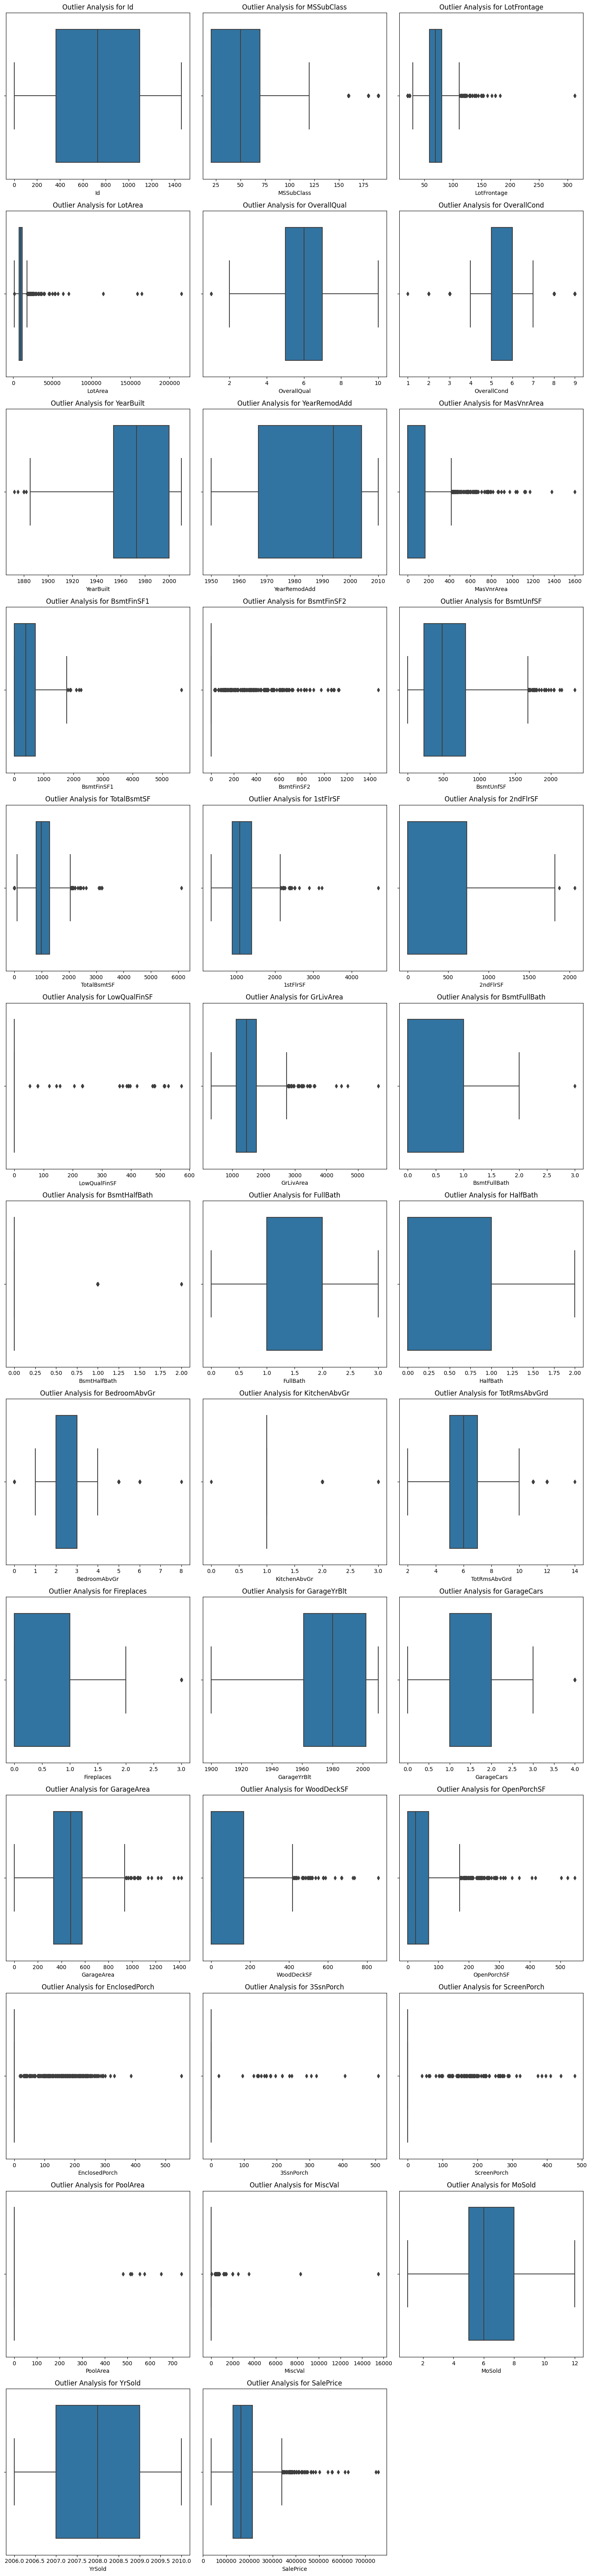

In [9]:
 
# Chọn số cột và hàng cho lưới
num_cols = 3  # Số cột
num_rows = (len(data.select_dtypes(include='number').columns) + num_cols - 1) // num_cols  # Tính số hàng cần thiết

# Tạo lưới các biểu đồ
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Lặp qua các cột và vẽ biểu đồ boxplot
for ax, column in zip(axes.flatten(), data.select_dtypes(include='number').columns):
    sns.boxplot(x=data[column], ax=ax)
    ax.set_title(f'Outlier Analysis for {column}')

# Ẩn các biểu đồ không sử dụng
for i in range(len(data.select_dtypes(include='number').columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

Correlations

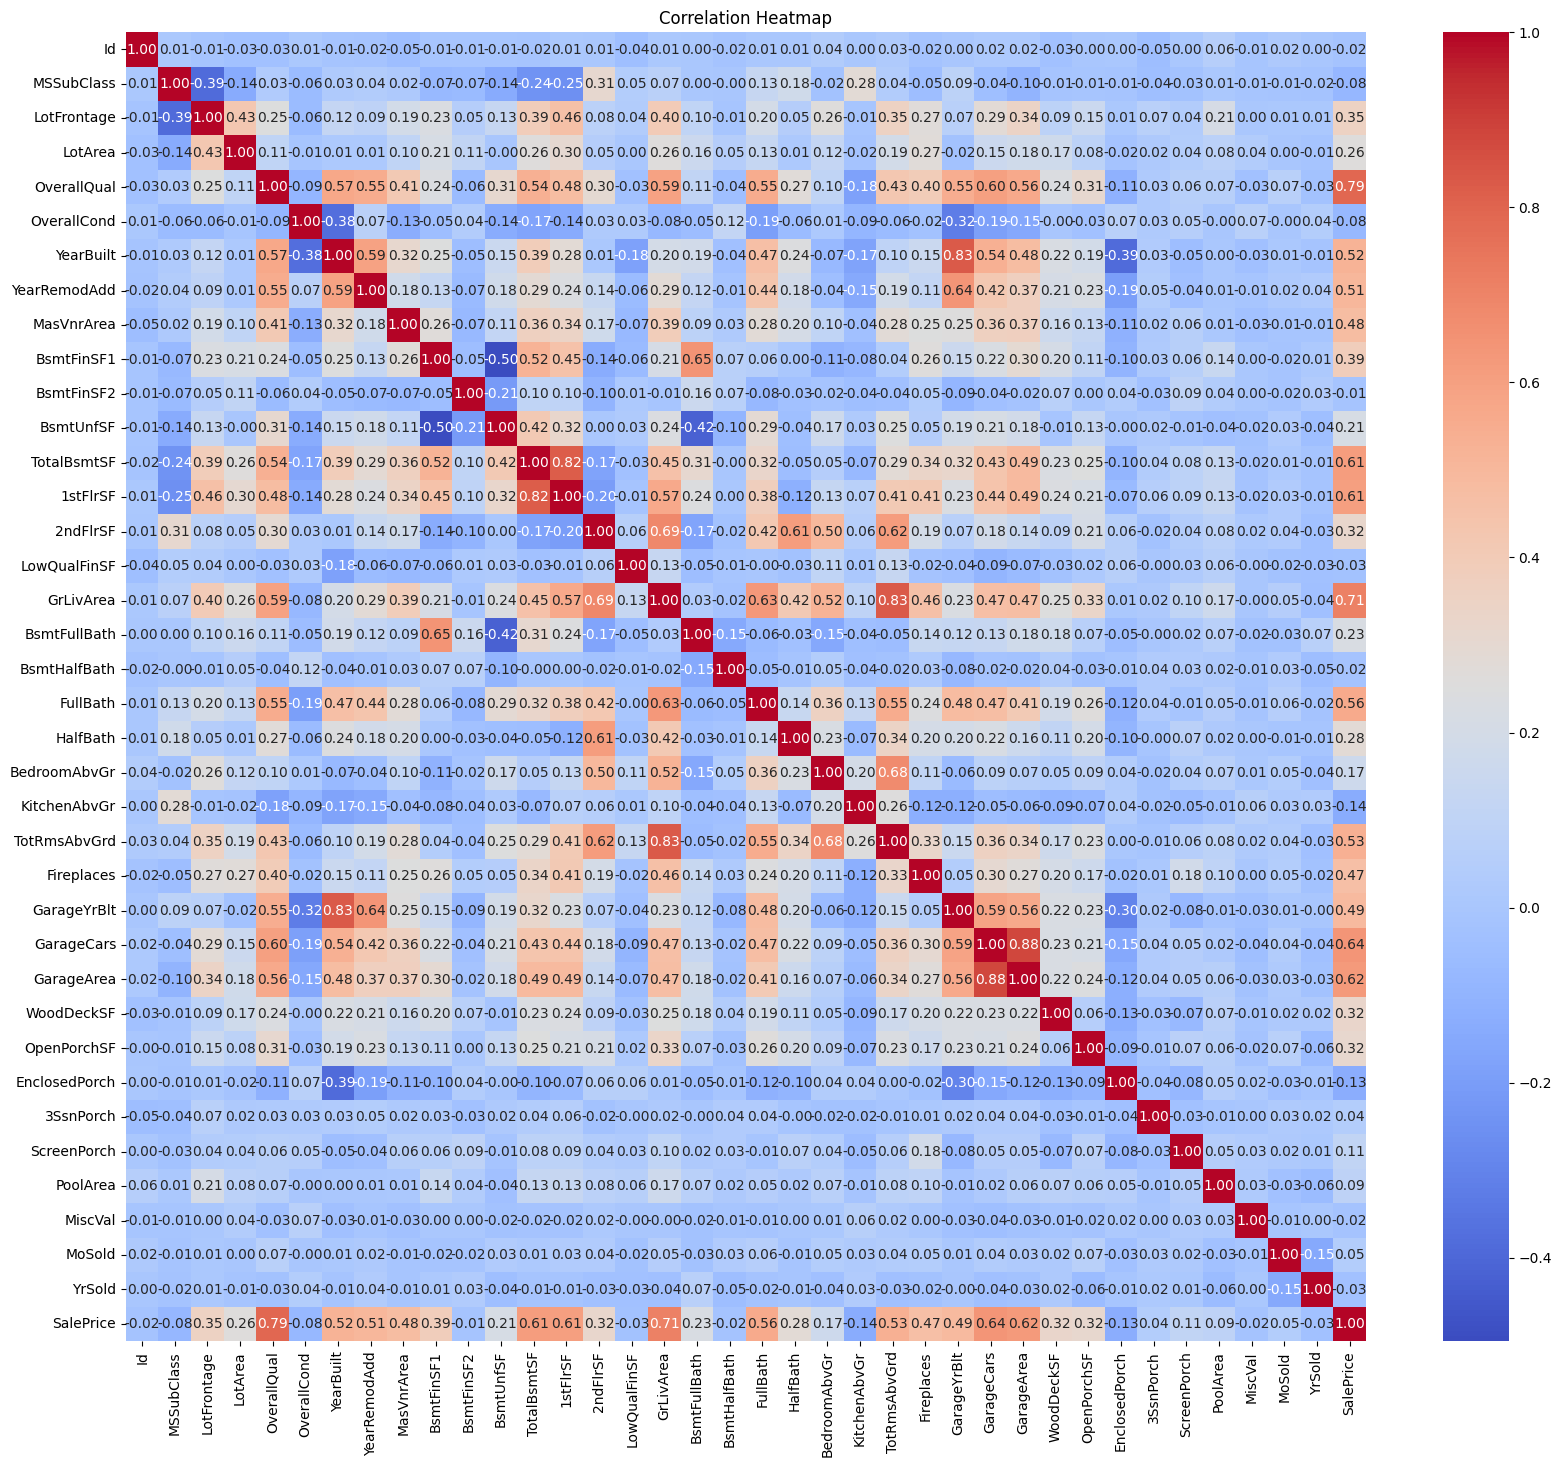

In [10]:
# Lọc chỉ các cột số
numeric_data = data.select_dtypes(include='number')

# Tính toán ma trận tương quan
correlation_matrix = numeric_data.corr()

# Vẽ heatmap
plt.figure(figsize= (20,17)) 
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()